In [2]:
# -*- coding: utf-8 -*-
"""
Created on May 27, 2024
Last modified on May 31, 2024
@Author: Guan-Fu Liu

To read and analyse the results for LRNAs.
"""
from read_results import *
import re
from matplotlib.gridspec import GridSpec
%matplotlib widget

The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
0.00686696764223117
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
0.006861090872718941


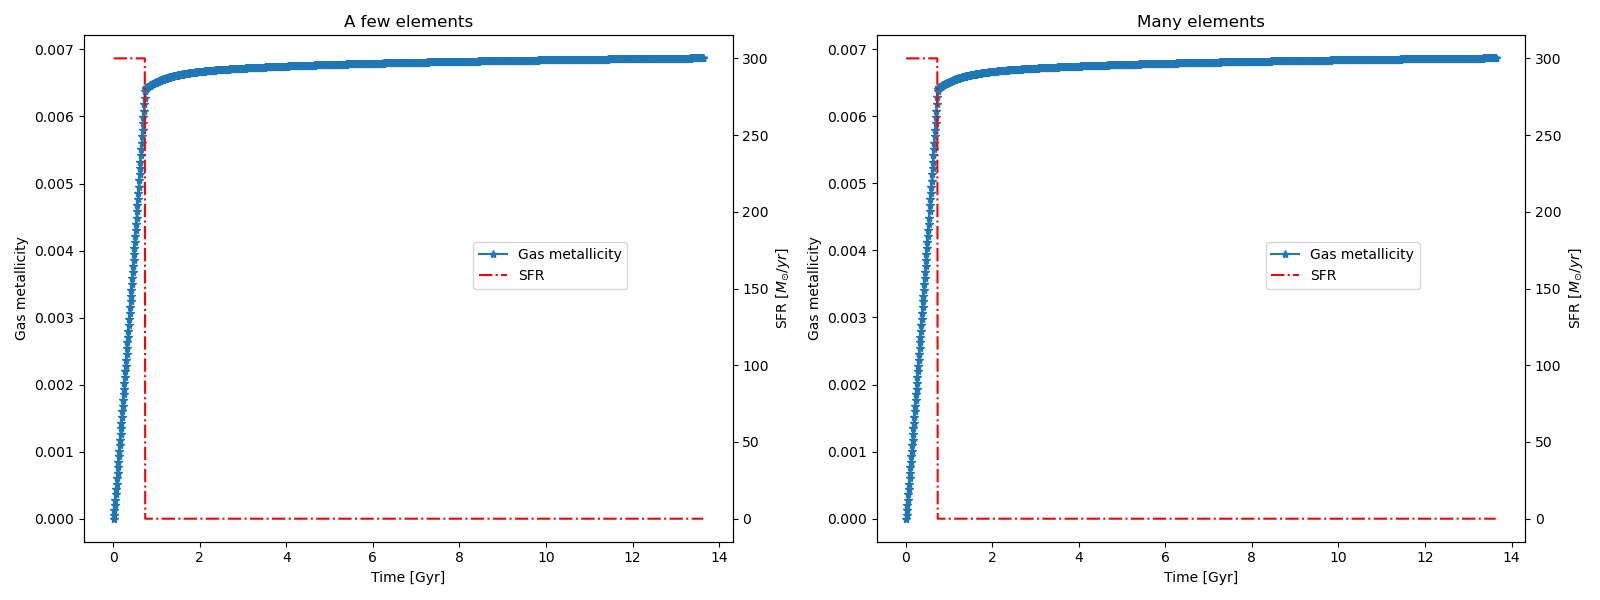

In [3]:
file_paths = ["./outputs/LRNAs/N13-Few-Elements-Log-Log.h5", "./outputs/LRNAs/N13-Many-Elements-Log-Log.h5"]
labels = ["A few elements", "Many elements"]

fig, axes = plt.subplots(1, 2, figsize=(16,6))
ZGas_all = [ ]
for i, file_path in enumerate(file_paths):
    ax = axes[i]
    yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifeAge_file, mass_lifeAge, SFH, StarInitElement,\
                StellarMass, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
                AGB_Element, YieldsTable, IMF_type, IMF_data, creation_Age, SFE, \
                interp_kind, comments, solar_set = read_results(file_path)

    line1, = ax.plot(SFH['Age']/1e9, ZGas, '-*')
    ax1 = ax.twinx()
    line2, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], '-.', color='r')
    ax.set_xlabel("Time [Gyr]")
    ax.set_ylabel("Gas metallicity")
    ax1.set_ylabel(r"SFR [$M_{\odot}/yr$]")
    ax.legend((line1, line2), ("Gas metallicity", "SFR"), loc=(0.6, 0.5))
    ax.set_title(labels[i])
    print(ZGas[-1])
    ZGas_all.append(ZGas)
fig.tight_layout()
plt.show()

In [4]:
# From observation data, multi-temperature model.
data = {}
data['O'] = 0.22
data['O_err'] = 0.035
data['Ne'] = 0.21
data['Ne_err'] = 0.055


def Get_obs_ratio(Zi, Zj, data=data):
    """
    Generate the observed Zi/Zj ratio, the error, and the 1, 2, 3 sigma range.

    Parameters
    ----------
    Zi : str
        The element name.
    Zj : str
        The element name.
    data : dict
        The dictionary of the observation data.
        It must contain 'Zi', 'Zj', 'Zi_err', 'Zj_err'.
    
    Returns
    -------
    data : dict
        The dictionary of the observation data.
        It contains 'Zi', 'Zj', 'Zi_err', 'Zj_err', 'Zi/Zj', 'Zi/Zj_err', 'Zi/Zj+1sigma', 'Zi/Zj-1sigma',
        'Zi/Zj+2sigma', 'Zi/Zj-2sigma', 'Zi/Zj+3sigma', 'Zi/Zj-3sigma'.
    """
    data['%s/%s'%(Zi,Zj)] = data[Zi]/data[Zj]
    data['%s/%s_err'%(Zi,Zj)] = np.sqrt((data['%s_err'%Zi]/data[Zj])**2+(data['%s_err'%Zj]*data[Zi]/data[Zj]**2)**2)
    data['%s/%s+1sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]+data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s-1sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]-data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s+2sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]+2*data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s-2sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]-2*data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s+3sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]+3*data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s-3sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]-3*data['%s/%s_err'%(Zi,Zj)]
    return data


obs_data = Get_obs_ratio('O', 'Ne', data=data)

In [5]:
np.array([(1, 2.0), (2, 3.0)], dtype=[('sigma', 'int'), ('value', 'float')])

array([(1, 2.), (2, 3.)], dtype=[('sigma', '<i8'), ('value', '<f8')])

The elements you notice but not available in the yield table of SNIa, Z=0.02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
0.006496765844091213
The elements you notice but not available in the yield table of SNIa, Z=0.02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
The lifetime should be a dictionary.
0.007547805779069713


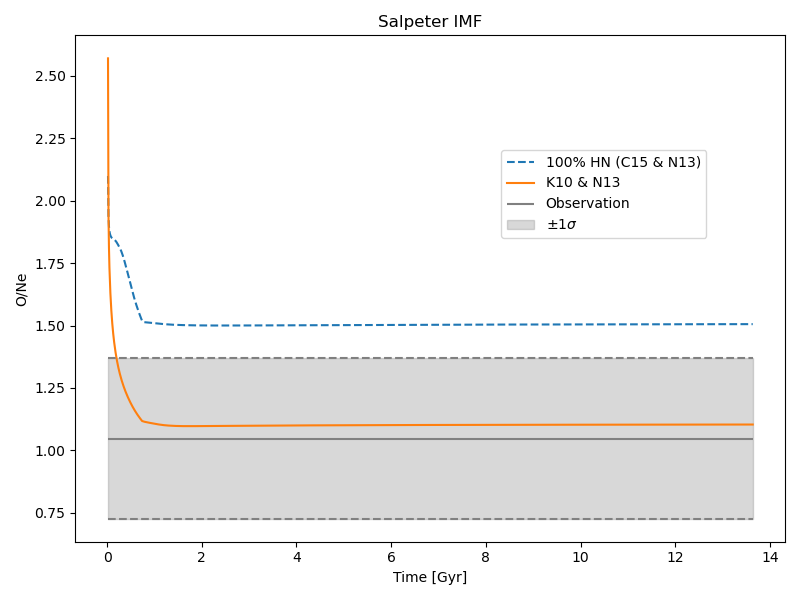

In [19]:
datainfo = np.array([ 
                    # ("./outputs/LRNAs/C15-N13-0.0-HN.h5", "0% HN (C15 & N13)", '-', '*'),
                    # ("./outputs/LRNAs/C15-N13-0.5-HN.h5", "50% HN (C15 & N13)", '--', 'o'),
                    ("./outputs/LRNAs/C15-N13-1.0-HN.h5", "100% HN (C15 & N13)", '--', ''),
                    # ("./outputs/LRNAs/N13.h5", "N13", '-', 'p'),
                    # ("./outputs/LRNAs/N13-2.7.h5", "N13-2.7", '--', 'v'),
                    # ("./outputs/LRNAs/MESA-only-F12-delay-wind.h5", "MESA & F12, delay wind model", '-', 'p'),
                    # ("./outputs/LRNAs/K06.h5", "K06", '--', '>'),
                    # ("./outputs/LRNAs/K10-K06-1.0-HN.h5", "100% HN (K10 & K06)", '-', '<'),
                    # ("./outputs/LRNAs/K10-K06-0.5-HN.h5", "50% HN (K10 & K06)", '-.', '>'),
                    # ("./outputs/LRNAs/K10-K06-0.0-HN.h5", "0% HN (K10 & K06)", '-.', 'd'),
                    ("./outputs/LRNAs/K10-N13.h5", "K10 & N13", '-', ''),
                    # ("./outputs/LRNAs/K10-N13-S16N20.h5", "K10, N13, and S16(N20)", ':', '*'),
                    # ("./outputs/LRNAs/K10-N13-S16W18.h5", "K10, N13, and S16(W18)", '-', ''),                    

                    ], dtype=[('file_path', object), ('label', object), ('line_style', object), ('marker', object)])

file_paths = datainfo['file_path']
labels = list(datainfo['label'])
line_styles = datainfo['line_style']
markers = datainfo['marker']
# file_paths = ["./outputs/LRNAs/C15-N13-0.0-HN.h5", "./outputs/LRNAs/C15-N13-0.5-HN.h5",
#               "./outputs/LRNAs/C15-N13-1.0-HN.h5", "./outputs/LRNAs/K10-N13.h5", 
#               "./outputs/LRNAs/N13.h5", "./outputs/LRNAs/N13-2.7.h5"]
# labels = ["0% HN (C15 & N13)", "50% HN (C15 & N13)", "100% HN (C15 & N13)", "K10 & N13", "N13", "N13-2.7"]
# line_styles = ['-', '--', '-.', ':']
# markers = ['*', 'o', 's', 'D']

fig, axes = plt.subplots(1, 1, figsize=(8,6))
Zi2Zj = {}
lines = [ ]
for i, file_path in enumerate(file_paths):
    Zi2Zj[labels[i]] = { }
    ax = axes
    yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifeAge_file, mass_lifeAge, SFH, StarInitElement,\
                StellarMass, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
                AGB_Element, YieldsTable, IMF_type, IMF_data, creation_Age, SFE, \
                interp_kind, comments, solar_set = read_results(file_path)
    Zi2Zj[labels[i]].update(GetZi2Zj(GasElement, "O", "Ne", solar_set,))
    line, = ax.plot(SFH['Age'][Zi2Zj[labels[i]]["O/Ne-mask"]]/1e9, Zi2Zj[labels[i]]["O/Ne"], 
                    linestyle=line_styles[i], marker=markers[i])
    lines.append(line)
    print(ZGas.max())
# ax1 = ax.twinx()
# line_sfh, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], '-.', color='r')

line = ax.hlines(obs_data['O/Ne'], SFH['Age'][0]/1e9, SFH['Age'][-1]/1e9, 'grey', '-')
lines.append(line)
labels.append("Observation")
line = ax.hlines(obs_data['O/Ne+1sigma'], SFH['Age'][0]/1e9, SFH['Age'][-1]/1e9, 'grey', '--')
# lines.append(line)
# labels.append(r"$\pm 1\sigma$")
ax.hlines(obs_data['O/Ne-1sigma'], SFH['Age'][0]/1e9, SFH['Age'][-1]/1e9, 'grey', '--')
line = ax.fill_between([SFH['Age'][0]/1e9, SFH['Age'][-1]/1e9], obs_data['O/Ne+1sigma'], 
                       obs_data['O/Ne-1sigma'], color='grey', alpha=0.3)
lines.append(line)
labels.append(r"$\pm 1\sigma$")

ax.set_xlabel("Time [Gyr]")
ax.set_ylabel("O/Ne")
ax1.set_ylabel(r"SFR [$M_{\odot}/yr$]")
ax.legend(lines, labels, loc=(0.6, 0.6))
ax.set_title("Salpeter IMF")
ZGas_all.append(ZGas)
fig.tight_layout()
fig.savefig("./outputs/LRNAs/O2Ne-Evo.pdf")
plt.show()